In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
dt_hoje = '2024-08-08'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funções

In [4]:
def drop_unnamed_cols(df):
    cols = df.columns
    cols_unnamed = [col for col in cols if str(col).startswith('Unnamed')]

    columns_to_drop = df[cols_unnamed].dropna(axis=1, how='all').columns

    return df.drop(columns=columns_to_drop)



def drop_null_cols(df):
    return df.dropna(axis=1, how='all')



def read_all_tables(dirname):
    all_dfs = {}

    list_files = os.listdir(dirname)

    for file_ in list_files:
        if file_.endswith(".csv"):
            file_name = os.path.splitext(file_)[0]
            df = pd.read_csv(os.path.join(dirname, file_))
            df_cleanned = drop_unnamed_cols(df)
            df_cleanned = drop_null_cols(df_cleanned)
            all_dfs[file_name] = df_cleanned

            print(file_)

    return all_dfs



def print_keys_with_column(data_dict, column_name):
    for key, df in data_dict.items():
        if column_name in df.columns:
            print(key)



def print_keys_with_column_like(data_dict, column_name_like):
    for key, df in data_dict.items():
        matching_columns = [col for col in df.columns if column_name_like in col]
        if matching_columns:
            print(key)



def search_tables_use_column(ls_data_dict, type_search, column_name):
    if type_search == 'like':
        for dict_data in ls_data_dict:
            print_keys_with_column_like(dict_data, column_name)
    elif type_search == 'exact':
        for dict_data in ls_data_dict:
            print_keys_with_column(dict_data, column_name)
    else:
        raise ValueError("Tipo de busca não suportado. Use 'like' ou 'exact'.")



def plot_qtd_stack_bar(df, x, y, group, figsize=(20,10), colors=None):
    # Se a group for nulo o gráfico de barras pode ver utilizado sem criar grupos dentro das barras
    if group:
        agg_tips = df.groupby([x, group])[y].count().unstack().fillna(0)
    else:
        agg_tips = df.groupby([x])[y].count().fillna(0).to_frame()

    fig, ax = plt.subplots(figsize=figsize)

    # colors = ['#008080', '#DAA520','#8A2BE2','#0000FF']
    if colors:
        pass
    else:
        colors = [None for i in range(agg_tips.shape[1])]

    bottom = np.zeros(len(agg_tips))

    lst_index = [str(i) for i in agg_tips.index]

    for i, col in enumerate(agg_tips.columns):
        ax.bar(
          lst_index, agg_tips[col], bottom=bottom, label=col, edgecolor = "black", color=colors[i]) #, color=colors[i]
        bottom += np.array(agg_tips[col])

    # Coloca o label de qtd de observações acima das barras.
    totals = agg_tips.sum(axis=1)
    lst_index_total = [str(i) for i in totals.index]
    y_offset = 5
    for i, total in enumerate(totals):
        ax.text(lst_index_total[i], total + y_offset, round(total), ha='center', weight='bold')

    # Se group é nulo não colocamos o label de qtd de observações dentro da barra
    if group:
        # Let's put the annotations inside the bars themselves by using a
        # negative offset.
        y_offset = -100
        # For each patch (basically each rectangle within the bar), add a label.
        for bar in ax.patches:
            ax.text(
                # Put the text in the middle of each bar. get_x returns the start
                # so we add half the width to get to the middle.
                bar.get_x() + bar.get_width() / 2,
                # Vertically, add the height of the bar to the start of the bar,
                # along with the offset.
                bar.get_y() + bar.get_height() / 2, #bar.get_height() + bar.get_y() + y_offset,
                # This is actual value we'll show.
                round(bar.get_height()),
                # Center the labels and style them a bit.
                ha='center',
                color='w',
                weight='bold',
                size=8
            )

        ax.set_title(f'Qtd de {y} por {group}')
        ax.legend()
        plt.xticks(rotation=90)

    else:
        ax.set_title(f'Qtd de {y}')
        ax.legend()
        plt.xticks(rotation=90)


# Lendo todas as tabelas

In [5]:
TbOutras = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/Outras tabelas/")
TbAbatimento = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbAbatimento/Originais anonimizados")
TbAlunos = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbAluno/Originais anonimizados")
TbCampoDinamico = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbCampoDinamico/Originais anonimizados")
TbCaptacao = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbCaptacao/Originais anonimizados")
TbDiario = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbDiario/Originais anonimizados")
TbFase = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbFase/Originais anonimizados")
TbHistorico = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbHistorico/Originais anonimizados")
TbMeta = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbMeta")
TbProfessor = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbProfessor/Originais anonimizados")
TbResponsavel = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbResponsavel/Originais anonimizados")
TbSerie = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbSerie/Originais anonimizados")
TbSituacaoAlunoDisciplina = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbSituacaoAlunoDisciplina/Originais anonimizados")
TbTurma = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbTurma/Originais anonimizados")
lst_todos_dados = [TbOutras, TbAbatimento, TbAlunos, TbCampoDinamico, TbCaptacao, TbDiario, TbFase, TbHistorico, TbMeta, TbProfessor, TbResponsavel, TbSerie, TbSituacaoAlunoDisciplina, TbTurma]

DictTodasTabelas = (TbOutras | TbAbatimento | TbAlunos | TbCampoDinamico | TbCaptacao | TbDiario | TbFase | TbHistorico | TbMeta | TbProfessor | TbResponsavel | TbSerie | TbSituacaoAlunoDisciplina | TbTurma)

TbPais.csv
TbMunicipio.csv
TbDisciplina.csv
TbCentroResultado.csv
TbPeriodo.csv
TbMotivoInativacao.csv
TbFormaIngresso.csv
TbFreqQuadroHorario.csv
TbCursoFases.csv
TbTipoOcorrencia.csv
TbGradeCurricular.csv
TbAbatimentoTipo.csv
TbAbatimento.csv
TbAlunoRotinaEducacaoInfantil.csv
TbAlunoTurmaHistorico.csv
TbAlunoProprioResponsavel.csv
TbAlunoObs.csv
TbAluno.csv
TbAlunoTurma.csv
TbCampoDinamicoConjuntoElemento.csv
TbCampoDinamico.csv
TbCampoDinamicoConjunto.csv
TbCaptacaoCursoInteresse.csv
TbCaptacaoMotivoDesistencia.csv
TbCaptacaoSituacaoLead.csv
TbCaptacaoOrigemLead.csv
TbDiarioFrequencia.csv
TbDiarioAluno.csv
TbDiario.csv
TbDiarioAula.csv
TbFaseNotaAluno.csv
TbFaseNota.csv
TbFaseNotaDisciplinaTurma.csv
TbFaseNotaOrigemDestino.csv
TbHistorico.csv
TbHistoricoNotas.csv
TbMeta.csv
TbMetaFaseNota.csv
TbMetaFaseNotaAluno.csv
TbMetaSituacaoAlunoDisciplina.csv
TbTipoMeta.csv
TbMetaConceito.csv
TbProfessorDisciplina.csv
TbProfessorHorario.csv
TbProfessor.csv
TbTipoVinculoAlunoResponsavel.csv
Tb

In [6]:
# Dataframes importantes
alunos_turmas_df = TbAlunos['TbAlunoTurma']
alunos_df = TbAlunos['TbAluno']
turmas_df = TbTurma['TbTurma']
situacao_aluno_turma_df = TbTurma['TbSituacaoAlunoTurma']

In [7]:
# Lista de motivos que parecem ter relação com um problema de adaptação com a metodologia
lst_motivos_inativacao_sem_adaptacao = [1,6,15,18]

In [8]:
alunos_turmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IdTurma                         9157 non-null   int64  
 1   IdAluno                         9157 non-null   int64  
 2   IdSituacaoAlunoTurma            9157 non-null   int64  
 3   DataSituacaoAtivo               9120 non-null   object 
 4   DataSituacaoInativo             7313 non-null   object 
 5   OrdemChamada                    9157 non-null   int64  
 6   DataHoraEfetivacaoMatricula     9120 non-null   object 
 7   IdUsuarioEfetivacaoMatricula    5010 non-null   float64
 8   ProblemaAutorizadoMatricula     2925 non-null   object 
 9   IdUsuarioAutorizacaoMatricula   2646 non-null   float64
 10  StAlunoTurmaNaoPermitePParcial  9157 non-null   bool   
 11  IdResponsavelFinanceiro         9138 non-null   float64
 12  IdTipoResponsavelFinanceiro     91

In [9]:
print("Qtd linhas:", alunos_turmas_df.shape[0])
print("Qtd de alunos:", alunos_turmas_df['IdAluno'].nunique())
print("Qtd de turmas:", alunos_turmas_df['IdTurma'].nunique())
print("Qtd de aluno e turmas:", alunos_turmas_df['IdAlunoTurma'].nunique())
print("Qtd de aluno e turmas:", alunos_turmas_df[['IdAluno','IdTurma']].drop_duplicates().shape[0])

Qtd linhas: 9157
Qtd de alunos: 2163
Qtd de turmas: 474
Qtd de aluno e turmas: 9157
Qtd de aluno e turmas: 9157


In [10]:
# Qtd de turmas por aluno
alunos_turmas_df.groupby('IdAluno')['IdTurma'].nunique().describe()

,IdTurma
count,2163.000000
mean,4.233472
std,2.876192
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


In [11]:
## Adicionando situação da turma
alunos_turmas_df = alunos_turmas_df.merge(situacao_aluno_turma_df[['IdSituacaoAlunoTurma','SituacaoAlunoTurma']], on='IdSituacaoAlunoTurma', how='left')
# alunos_turmas_df.info()

print("Qtd linhas:", alunos_turmas_df.shape[0])

Qtd linhas: 9157


## Criando e tratando colunas colunas

In [12]:
alunos_turmas_df['InativacaoPorFaltaAdaptacao'] = np.where(alunos_turmas_df['IdMotivoInativacao'].isin(lst_motivos_inativacao_sem_adaptacao), 'Sim', 'Não')
alunos_turmas_df['target'] = np.where(alunos_turmas_df['InativacaoPorFaltaAdaptacao'] == 'Sim', 1, 0)
alunos_turmas_df['DataSituacaoAtivo'] = pd.to_datetime(alunos_turmas_df['DataSituacaoAtivo'])
alunos_turmas_df['DataSituacaoInativo'] = pd.to_datetime(alunos_turmas_df['DataSituacaoInativo'])
alunos_turmas_df['DataHoraEfetivacaoMatricula'] = pd.to_datetime(alunos_turmas_df['DataHoraEfetivacaoMatricula'])
alunos_turmas_df['AnoMesAtivo'] = alunos_turmas_df['DataSituacaoAtivo'].dt.strftime('%Y%m')
alunos_turmas_df['AnoMesInativo'] = alunos_turmas_df['DataSituacaoInativo'].dt.strftime('%Y%m')
alunos_turmas_df['AnoMesEfetivacaoMatricula'] = alunos_turmas_df['DataHoraEfetivacaoMatricula'].dt.strftime('%Y%m')
alunos_turmas_df['DifDiasInativoAtivo'] = (alunos_turmas_df['DataSituacaoInativo'] - alunos_turmas_df['DataSituacaoAtivo']).dt.days
alunos_turmas_df['DifDiasInativoMatricula'] = (alunos_turmas_df['DataSituacaoInativo'] - alunos_turmas_df['DataHoraEfetivacaoMatricula']).dt.days

## Analisando

In [29]:
# Existem alunos com datas de matriculas difentes ?
alunos_turmas_df[['IdAluno','DataHoraEfetivacaoMatricula']].drop_duplicates().groupby(
    'IdAluno')['DataHoraEfetivacaoMatricula'].nunique().sort_values()#.describe()

,DataHoraEfetivacaoMatricula
IdAluno,
2262,0
2242,0
2243,0
2244,0
2245,0
...,...
142,13
269,13
270,13


In [13]:
# Data máxima e mínima para quem teve inativação
alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').agg(MIN_DATE=('DataSituacaoInativo','min'), MAX_DATE=('DataSituacaoInativo','max'))

,MIN_DATE,MAX_DATE
InativacaoPorFaltaAdaptacao,,
Não,2021-08-24,2024-06-28 16:01:00
Sim,2021-09-15,2024-06-21 15:43:00


In [14]:
# Qtd média de dias entre os ativar e inativar
# alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').agg(MEDIA_DIAS=('DifDiasInativoAtivo','mean'))
alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').describe()['DifDiasInativoAtivo']

,count,mean,min,25%,50%,75%,max,std
InativacaoPorFaltaAdaptacao,,,,,,,,
Não,7029.0,322.680751,44.0,364.00,364.0,364.0,364.0,85.874040
Sim,284.0,195.147887,57.0,142.25,172.0,248.0,349.0,73.044345


In [24]:
# Qtd média de dias entre matricula e inativação
alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').describe()['DifDiasInativoMatricula']

,count,mean,min,25%,50%,75%,max,std
InativacaoPorFaltaAdaptacao,,,,,,,,
Não,7029.0,223.775075,-1.0,140.0,271.0,316.00,347.0,97.783839
Sim,284.0,115.989437,0.0,72.0,103.0,159.25,293.0,64.922758


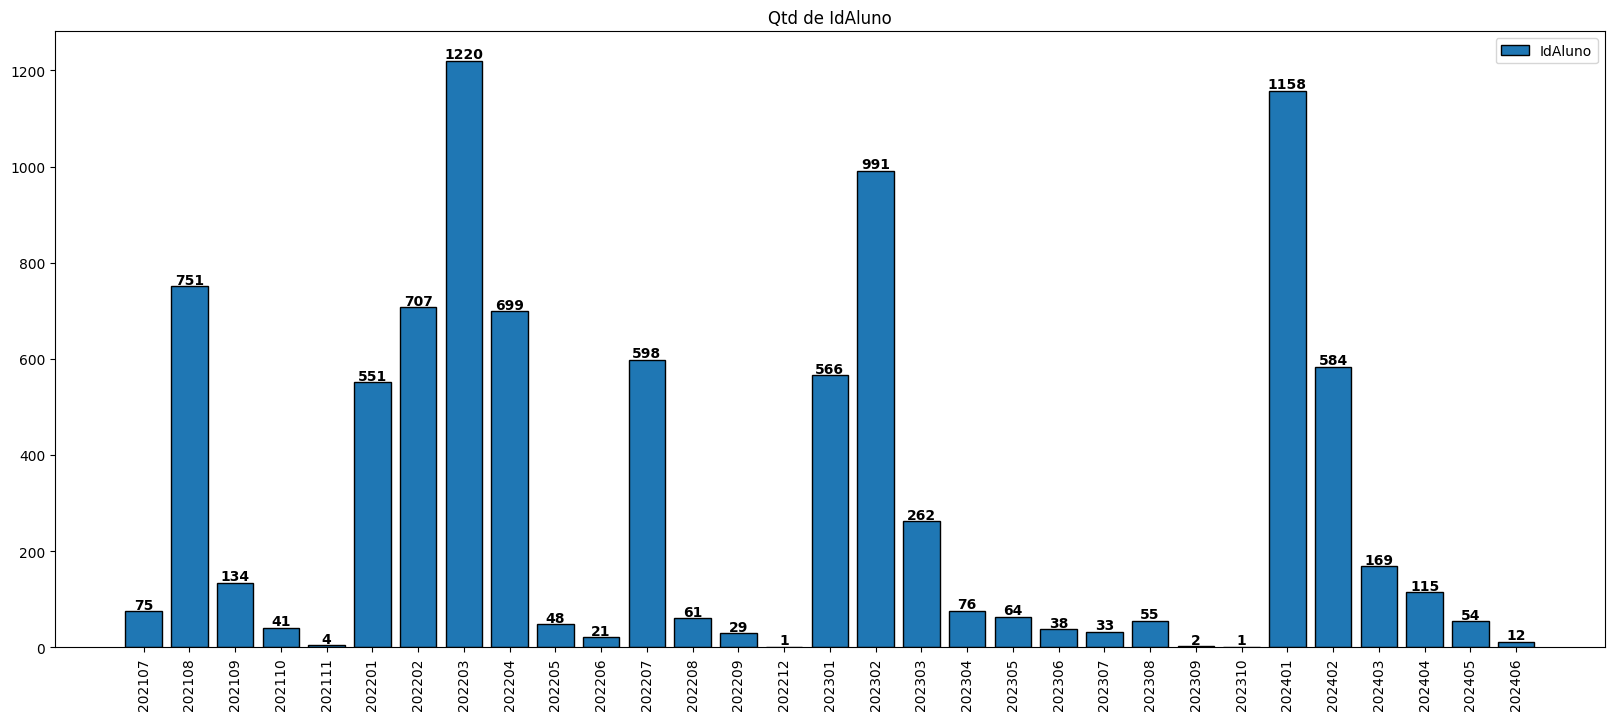

In [16]:
# Qtd de alunos por ano e mês da matricula
plot_qtd_stack_bar(alunos_turmas_df, x='AnoMesEfetivacaoMatricula', y='IdAluno', group=None, figsize=(20,8))


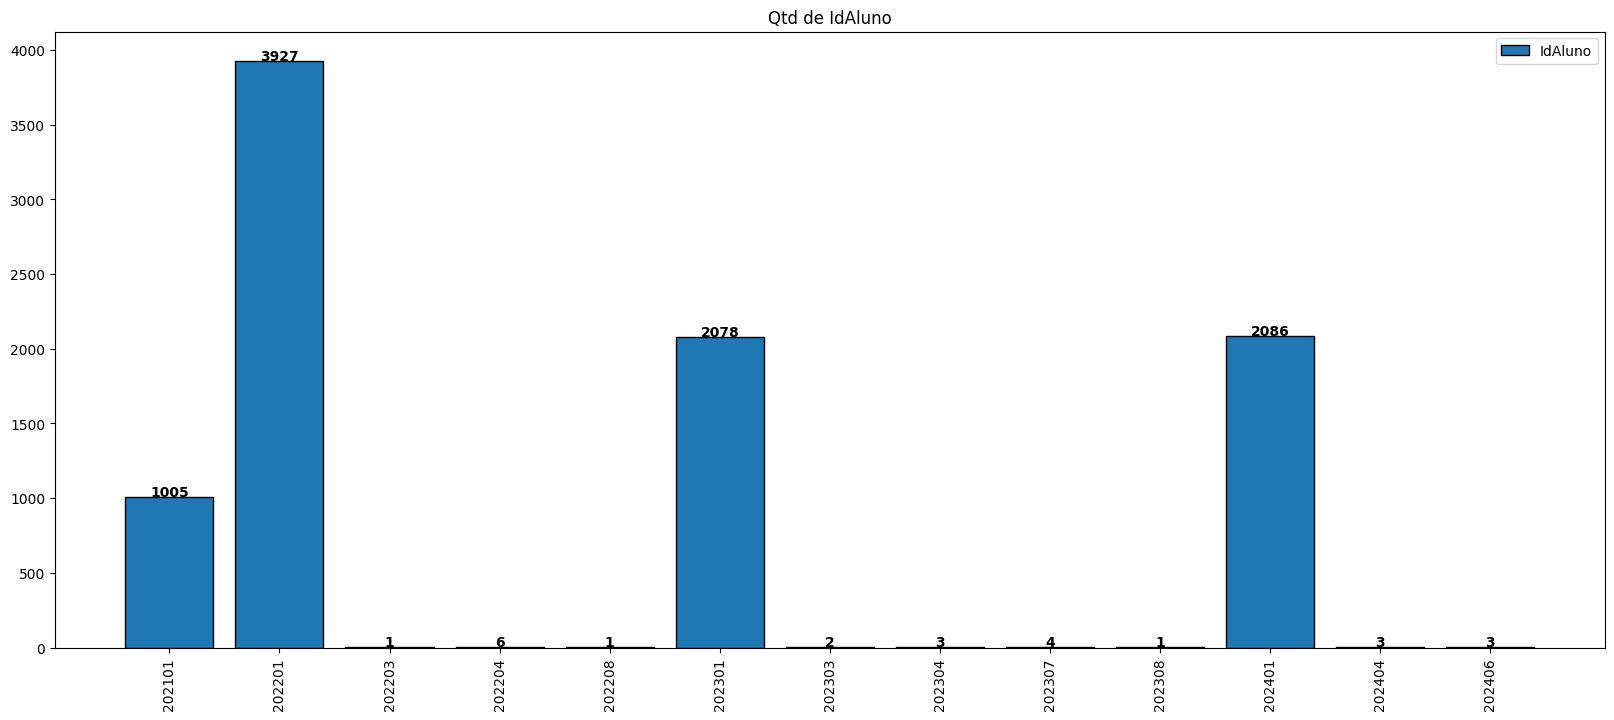

In [17]:
# Qtd de alunos por ano e mês de ativação
plot_qtd_stack_bar(alunos_turmas_df, x='AnoMesAtivo', y='IdAluno', group=None, figsize=(20,8))

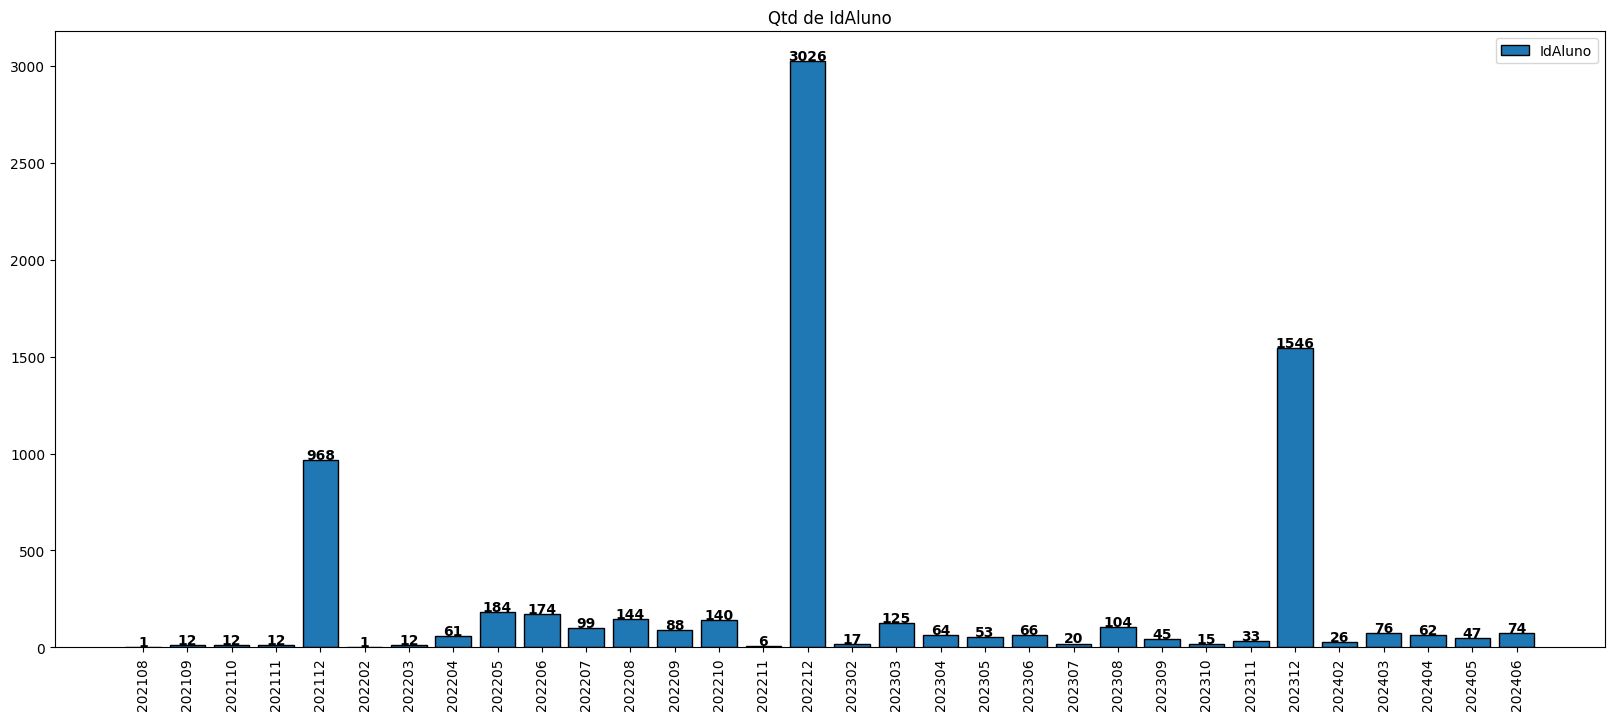

In [18]:
# Qtd de alunos por ano e mês da inativação
plot_qtd_stack_bar(alunos_turmas_df, x='AnoMesInativo', y='IdAluno', group=None, figsize=(20,8))

In [19]:
# Qtd de alunos e turma por situação
alunos_turmas_df.groupby('SituacaoAlunoTurma')['IdAlunoTurma'].nunique()

,IdAlunoTurma
SituacaoAlunoTurma,
Aprovado P. Parcial,71
Cursando,1807
Desistente,1545
Mudança de Fase,236
Pré-matrícula,37
Reprovado,27
Troca de Fase *Anual,5434


In [20]:
alunos_turmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   IdTurma                         9157 non-null   int64         
 1   IdAluno                         9157 non-null   int64         
 2   IdSituacaoAlunoTurma            9157 non-null   int64         
 3   DataSituacaoAtivo               9120 non-null   datetime64[ns]
 4   DataSituacaoInativo             7313 non-null   datetime64[ns]
 5   OrdemChamada                    9157 non-null   int64         
 6   DataHoraEfetivacaoMatricula     9120 non-null   datetime64[ns]
 7   IdUsuarioEfetivacaoMatricula    5010 non-null   float64       
 8   ProblemaAutorizadoMatricula     2925 non-null   object        
 9   IdUsuarioAutorizacaoMatricula   2646 non-null   float64       
 10  StAlunoTurmaNaoPermitePParcial  9157 non-null   bool          
 11  IdRe

In [21]:
turmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   IdTurma                                   526 non-null    int64  
 1   IdSerie                                   526 non-null    int64  
 2   IdPeriodo                                 526 non-null    int64  
 3   TipoTurma                                 526 non-null    object 
 4   IdDisciplina                              86 non-null     float64
 5   NomeTurma                                 526 non-null    object 
 6   SiglaTurma                                526 non-null    object 
 7   TurnoPrincipal                            526 non-null    object 
 8   TotalVagas                                504 non-null    float64
 9   IdUsuarioCoordenador                      20 non-null     float64
 10  CodigoAgrupamento                     

In [22]:
search_tables_use_column(lst_todos_dados, 'exact', 'IdTurma')

TbFreqQuadroHorario
TbAlunoRotinaEducacaoInfantil
TbAlunoTurmaHistorico
TbAlunoTurma
TbDiario
TbFaseNotaAluno
TbFaseNotaDisciplinaTurma
TbMetaFaseNotaAluno
TbMetaSituacaoAlunoDisciplina
TbSituacaoAlunoDisciplina
TbTurma
TbTurmaProfessorSecundario
TbTurmaProfessor


In [23]:
TbDiario['TbDiario'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   IdDiario                       2540 non-null   int64 
 1   IdTurma                        2540 non-null   int64 
 2   IdDisciplina                   2540 non-null   int64 
 3   Descricao                      2540 non-null   object
 4   IdFaseNota                     2540 non-null   int64 
 5   TipoConfirmacao                2540 non-null   object
 6   QtdeMaximaAulas                2540 non-null   int64 
 7   DataLimiteDigitacao            2540 non-null   object
 8   QtdeMinimaAulas                2540 non-null   int64 
 9   StRegistroAulaPeriodoFaseNota  2540 non-null   bool  
 10  DataBloqueioDigitacaoAula      585 non-null    object
dtypes: bool(1), int64(6), object(4)
memory usage: 201.0+ KB


## Premissas

In [31]:
# Remover linhas com IdSituacaoAlunoTurma == 5 (Pré-matrícula)
# Trabalhar apenas com aluno matriculado (DataHoraEfetivacaoMatricula NOT NULL)

In [31]:
alunos_turmas_df[alunos_turmas_df['IdAluno'] == 267].sort_values(by='DataHoraEfetivacaoMatricula')

,IdTurma,IdAluno,IdSituacaoAlunoTurma,DataSituacaoAtivo,DataSituacaoInativo,OrdemChamada,DataHoraEfetivacaoMatricula,IdUsuarioEfetivacaoMatricula,ProblemaAutorizadoMatricula,IdUsuarioAutorizacaoMatricula,...,IdPlanoPagamento_Matricula,IdAlunoTurma,SituacaoAlunoTurma,InativacaoPorFaltaAdaptacao,target,AnoMesAtivo,AnoMesInativo,AnoMesEfetivacaoMatricula,DifDiasInativoAtivo,DifDiasInativoMatricula
226,98,267,9,2021-01-01,2021-12-31 00:00:00,4,2021-08-11 00:00:00,NaN,NaN,NaN,...,8.0,272,Troca de Fase *Anual,Não,0,202101,202112,202108,364.0,142.0
1315,179,267,19,2022-01-01,2022-07-23 19:26:00,15,2022-01-21 00:00:00,NaN,#ALUNO_MATRICULA_INVALIDA##ALUNO_APROVADO_MESM...,16.0,...,9.0,1813,Mudança de Fase,Não,0,202201,202207,202201,203.0,183.0
2553,431,267,19,2022-01-01,2022-07-23 00:00:00,83,2022-03-16 00:00:00,NaN,NaN,NaN,...,NaN,4006,Mudança de Fase,Não,0,202201,202207,202203,203.0,129.0
3705,444,267,19,2022-01-01,2022-07-23 00:00:00,82,2022-04-05 00:00:00,NaN,NaN,NaN,...,NaN,5850,Mudança de Fase,Não,0,202201,202207,202204,203.0,109.0
4653,256,267,9,2022-01-01,2022-12-31 00:00:00,7,2022-07-23 14:08:00,15.0,#LIMITE_VAGAS_TURMA##ALUNO_MATRICULA_INVALIDA#,15.0,...,9.0,6961,Troca de Fase *Anual,Não,0,202201,202212,202207,364.0,160.0
4697,216,267,9,2022-01-01,2022-12-31 00:00:00,28,2022-07-23 19:24:00,15.0,#MATRICULA_REPETIDA_MESMA_SERIE#,15.0,...,9.0,7007,Troca de Fase *Anual,Não,0,202201,202212,202207,364.0,160.0
4698,441,267,9,2022-01-01,2022-12-31 00:00:00,28,2022-07-23 19:25:00,15.0,#MATRICULA_REPETIDA_MESMA_SERIE#,15.0,...,9.0,7008,Troca de Fase *Anual,Não,0,202201,202212,202207,364.0,160.0
4711,277,267,9,2022-01-01,2022-12-31 00:00:00,10,2022-07-23 20:04:00,313.0,#MATRICULA_REPETIDA_MESMA_SERIE#,313.0,...,9.0,7021,Troca de Fase *Anual,Não,0,202201,202212,202207,364.0,160.0
5175,582,267,9,2023-01-01,2023-12-31 00:00:00,7,2023-01-28 16:42:00,297.0,#ALUNO_CURSANDO_TURMA_PERIODO_ANTERIOR#,297.0,...,10.0,7581,Troca de Fase *Anual,Não,0,202301,202312,202301,364.0,336.0
6449,592,267,9,2023-01-01,2023-12-31 00:00:00,5,2023-02-10 13:30:00,15.0,NaN,NaN,...,10.0,9425,Troca de Fase *Anual,Não,0,202301,202312,202302,364.0,323.0


In [33]:
search_tables_use_column(lst_todos_dados, 'exact', 'IdSituacaoAlunoTurma')

TbAlunoTurmaHistorico
TbAlunoTurma
TbSituacaoAlunoTurma


In [32]:
TbTurma['TbSituacaoAlunoTurma']

,IdSituacaoAlunoTurma,SituacaoAlunoTurma,SituacaoSistema,SituacaoAcademica,StPermitirDigitacaoNotaFalta,StPermiteAssinaturaEletronica,CdSituacaoEducaCenso,DominioSituacaoAlunoTurma
0,1,Cursando,A,NaN,True,False,NaN,nao_informado
1,5,Pré-matrícula,P,NaN,False,False,NaN,nao_informado
2,9,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
3,10,Mantido Fase *Anual,I,R,True,False,NaN,nao_informado
4,12,Aprovado P. Parcial,I,D,True,False,NaN,nao_informado
5,14,Desistente,I,NaN,False,False,NaN,nao_informado
6,15,Lista de espera,S,NaN,False,False,NaN,nao_informado
7,16,Pré-matrícula online,P,NaN,False,False,NaN,nao_informado
8,19,Mudança de Fase,I,NaN,False,False,1.0,nao_informado
9,21,Retido Idade *Anual,I,R,True,False,NaN,nao_informado


In [35]:
TbTurma['TbSituacaoAlunoTurma']

,IdSituacaoAlunoTurma,SituacaoAlunoTurma,SituacaoSistema,SituacaoAcademica,StPermitirDigitacaoNotaFalta,StPermiteAssinaturaEletronica,CdSituacaoEducaCenso,DominioSituacaoAlunoTurma
0,1,Cursando,A,NaN,True,False,NaN,nao_informado
1,5,Pré-matrícula,P,NaN,False,False,NaN,nao_informado
2,9,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
3,10,Mantido Fase *Anual,I,R,True,False,NaN,nao_informado
4,12,Aprovado P. Parcial,I,D,True,False,NaN,nao_informado
5,14,Desistente,I,NaN,False,False,NaN,nao_informado
6,15,Lista de espera,S,NaN,False,False,NaN,nao_informado
7,16,Pré-matrícula online,P,NaN,False,False,NaN,nao_informado
8,19,Mudança de Fase,I,NaN,False,False,1.0,nao_informado
9,21,Retido Idade *Anual,I,R,True,False,NaN,nao_informado


# Visualização do relacionamento entre as tabelas

In [36]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

# def visualize_dataframe_relationships(dataframes_dict, layout='spring_layout', filename='graph.png'):
#     """
#     Visualizes the relationships between pandas DataFrames based on shared columns.

#     Args:
#     dataframes_dict: A dictionary of pandas DataFrames where keys are DataFrame names.
#     layout: The layout algorithm to use (default: 'spring_layout'). Other options: 'circular_layout', 'shell_layout', 'spectral_layout', 'random_layout'

#     Returns:
#     None
#     """
#     plt.figure(figsize=(30, 30))

#     G = nx.Graph()

#     # Add nodes with DataFrame names
#     for df_name, df in dataframes_dict.items():
#         G.add_node(df_name)

#     # Add edges with shared columns
#     for df_name1, df1 in dataframes_dict.items():
#         for df_name2, df2 in dataframes_dict.items():
#             if df_name1 != df_name2:
#                 shared_cols = set(df1.columns) & set(df2.columns)
#                 for col in shared_cols:
#                     G.add_edge(df_name1, df_name2, label=col)

#     # Add edges for all shared columns between all DataFrames
#     all_columns = set()
#     for df in dataframes_dict.values():
#         all_columns.update(df.columns)

#     for col in all_columns:
#         dfs_with_col = [df_name for df_name, df in dataframes_dict.items() if col in df.columns]
#         for i in range(len(dfs_with_col) - 1):
#             for j in range(i + 1, len(dfs_with_col)):
#                 G.add_edge(dfs_with_col[i], dfs_with_col[j], label=col)

#     # Choose layout algorithm
#     if layout == 'circular_layout':
#         pos = nx.circular_layout(G)
#     elif layout == 'shell_layout':
#         pos = nx.shell_layout(G)
#     elif layout == 'spectral_layout':
#         pos = nx.spectral_layout(G)
#     elif layout == 'random_layout':
#         pos = nx.random_layout(G)
#     else:
#         pos = nx.spring_layout(G, k=50)

#     # Visualize the graph
#     nx.draw_networkx_nodes(G, pos, node_size=100)
#     nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
#     nx.draw_networkx_edges(G, pos, width=1)
#     edge_labels = nx.get_edge_attributes(G, 'label')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#     plt.axis('off')
#     # nx.write_gexf(G, "test.gexf")
#     plt.savefig(filename, format='png', dpi=1000)  # Save the figure
#     # plt.show()


In [38]:
# visualize_dataframe_relationships(DictTodasTabelas)